In [1]:
# Required libraries
from numpy import sort, genfromtxt, arange
from matplotlib.pyplot import subplots, show, savefig, subplots_adjust
from matplotlib.ticker import MultipleLocator

In [2]:
def setValues(arr):
    """
    Sets values for colors, potential, actual, and names.
    """
    global colors
    global potential
    global actual
    global names
    colors = ['#' + color.strip() for color in arr['color']]
    potential = arr['potential']
    actual = arr['actual']
    names = arr['name']

In [3]:
# Read data from file
rawData = genfromtxt('favorability.txt', delimiter=',', names=True, dtype=None, encoding=None)
data = sort(rawData, order='name')

setValues(data)
for i in range(len(data)):
    print(data[i])

('Benjamin', ' 850000', 57, 58)
('Bridget', ' 003080', 56, 84)
('Charles', ' 259c00', 81, 89)
('Eleanor', ' e76a13', 98, 100)
('Isabella', ' ffaed7', 96, 100)
('James', ' 8f8f8f', 65, 79)
('Jeff', ' ffc300', 93, 100)
('Liam', ' 8fbdff', 76, 78)
('Oliver', ' 0073ff', 72, 91)
('Richard', ' fffc61', 91, 98)
('Sofia', ' b02eff', 79, 84)
('Thomas', ' db4f96', 61, 70)
('William', ' 0d0d0d', 82, 92)


In [4]:
print("Differences In Actual vs Potential: \n------------------------------------")
for i in range(len(data)):
    formatLine = "{:<15} {:<15}".format(names[i], (potential[i] - actual[i]))
    print(formatLine)

Differences In Actual vs Potential: 
------------------------------------
Benjamin        1              
Bridget         28             
Charles         8              
Eleanor         2              
Isabella        4              
James           14             
Jeff            7              
Liam            2              
Oliver          19             
Richard         7              
Sofia           5              
Thomas          9              
William         10             


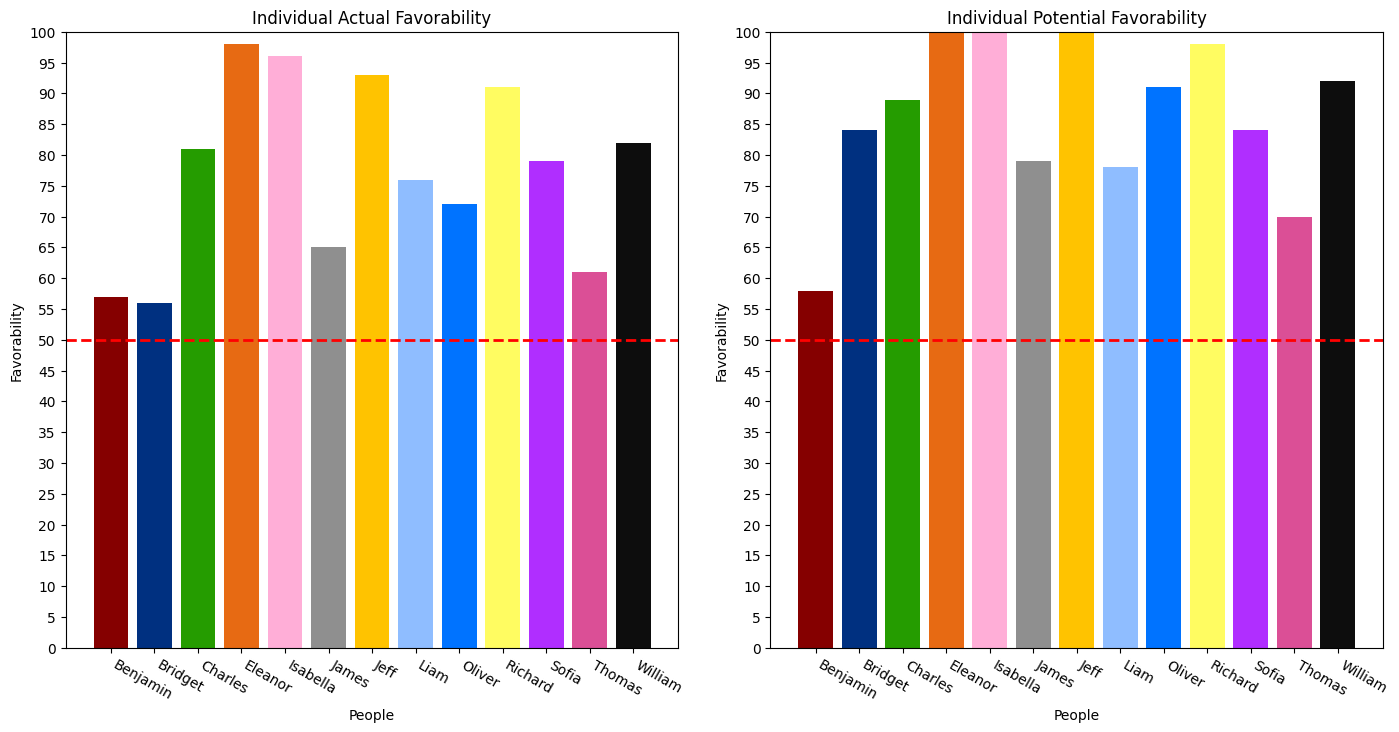

In [5]:
# Set the positions for the tick labels
positions = arange(len(names))

fig, (ax1, ax2) = subplots(1, 2, figsize=(17, 8))

# Auto sets bar graph given parameters
def plotBar(title, ax, data, names, colors):
    ax.set_ylim(0, 100)
    ax.set_xlabel('People')
    ax.set_ylabel('Favorability')
    ax.set_title(title)
    ax.bar(positions, data, color=colors)
    ax.axhline(50, color='red', linestyle='dashed', linewidth=2)
    ax.set_xticks(positions, names, rotation=-30, ha='left')
    ax.yaxis.set_major_locator(MultipleLocator(5))
    
plotBar('Individual Actual Favorability', ax1, actual, names, colors)
plotBar('Individual Potential Favorability', ax2, potential, names, colors)

# Show the plot
subplots_adjust(wspace=0.15)
savefig('favorability.png')
show()

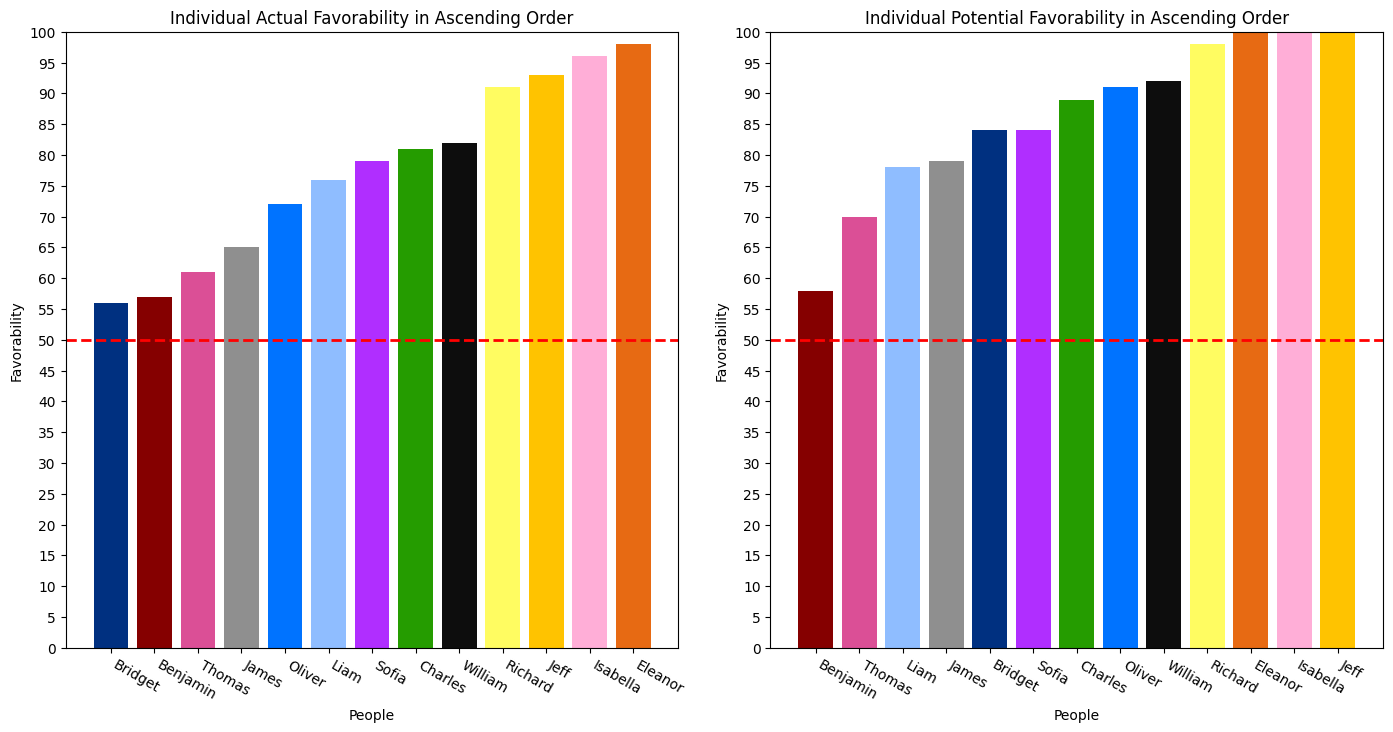

In [6]:
sortActual = sort(data, order='actual')
setValues(sortActual)
fig, (ax1, ax2) = subplots(1, 2, figsize=(17, 8))
plotBar('Individual Actual Favorability in Ascending Order', ax1, actual, names, colors)

sortedPotential = sort(rawData, order='potential')
setValues(sortedPotential)
plotBar('Individual Potential Favorability in Ascending Order', ax2, potential, names, colors)

subplots_adjust(wspace=0.15)
savefig('favorabilitySorted.png')
show()